In [ ]:
#import packages needed
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #mount drive to access car.csv

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# 1. Project Overview
---

The used car market represents a significant segment of the automotive industry, with millions of transactions occurring annually. However, pricing in this market often lacks transparency, creating challenges for both buyers and sellers in determining fair market values. This project addresses the critical need for data-driven price prediction in the used car market by developing a machine learning model that can accurately estimate vehicle prices based on key characteristics.

## Project Objectives

The primary objective of this analysis is to build a predictive model that can reliably estimate used car prices using readily available vehicle features. Specifically, this project aims to:

1. Develop a robust price prediction model using machine learning techniques that can serve as a pricing reference tool for market participants
2. Identify the most influential factors** that drive used car pricing decisions in the current market
3. Quantify the relationships between vehicle characteristics and market value to provide actionable insights
4. Evaluate model performance to determine the reliability and practical applicability of the predictions

## Main Research Questions

This analysis seeks to answer several key questions that are fundamental to understanding used car pricing dynamics:

- **What are the most significant predictors of used car prices?** Understanding which vehicle characteristics have the greatest impact on pricing decisions
- **How accurately can machine learning models predict used car values?** Determining the feasibility of automated price estimation systems
- **What is the relative importance of different vehicle features?** Ranking factors like mileage, age, brand, and condition in terms of their pricing influence
- **How do different vehicle characteristics interact to influence pricing?** Exploring the relationships between multiple features and their combined effect on market value

## Project Summary

### Data and Methodology

This project utilizes a comprehensive dataset of used car listings containing 13,000+ vehicle records with detailed information including price, mileage, model year, brand, transmission type, fuel type, accident history, and clean title status. The analysis employs a systematic approach combining exploratory data analysis, statistical modeling, and machine learning techniques.

The methodology includes rigorous data preprocessing with outlier detection and removal using IQR methods, missing value imputation, and feature engineering. A Random Forest regression model was selected as the primary predictive algorithm due to its ability to handle mixed data types and provide feature importance rankings.

### Analytical Methods

The analysis incorporates multiple complementary approaches:

- **Exploratory Data Analysis**: Distribution analysis, correlation studies, and categorical comparisons to understand data patterns
- **Data Preprocessing**: Outlier removal, missing value imputation, and categorical variable encoding
- **Predictive Modeling**: Random Forest regression with train-test validation
- **Feature Importance Analysis**: Quantitative ranking of variables influencing price predictions
- **Performance Evaluation**: Multiple metrics including R², RMSE, and MAE to assess model reliability

### Key Findings

The analysis reveals several significant insights about used car pricing:

**Model Performance**: The Random Forest model achieves excellent predictive performance with an R² score of 0.8187, indicating that the model explains approximately 82% of the variance in car prices. The average prediction error (MAE) is $6,299.91, demonstrating practical utility while acknowledging inherent market variability.

**Primary Price Drivers**: Three factors emerge as dominant predictors of used car prices:
1. **Mileage** (38.96% importance) - Lower mileage vehicles command significantly higher prices
2. **Engine specifications** (27.54% importance) - Engine type and size substantially influence pricing
3. **Model year** (18.94% importance) - Newer vehicles maintain higher market values

**Market Structure**: The analysis reveals a typical used car market with an average price of \$33,518, where most vehicles are priced between $16,500 and \$45,500. Strong positive correlations exist between price and model year while a negative correlation exists between price and mileage confirming expected market behaviors.

**Secondary Factors**: While less influential than the primary trio, transmission type, accident history, brand reputation, and fuel type also contribute meaningfully to price determination, providing a comprehensive framework for understanding market valuation.

These findings provide valuable insights for market participants and establish a foundation for data-driven decision-making in the used car market, while also identifying areas for future research and model enhancement.


# 2. Data Description
---
- Data Source: Describe the origin of your dataset. Provide a link if applicable.
- Data Loading: Present the code and methods for acquiring the data. Load the data into appropriate format for analysis.
- Dataset Analysis: Analyze the key attributes and features of your dataset (e.g., number of rows, columns, types of data).
- Data Cleaning: Clean and preprocess the data, including handling missing values or duplicates.

In [ ]:
# Load the dataset
raw_df = pd.read_csv('/content/drive/MyDrive/INFO212/Colab Notebooks/used_cars.csv') #read in the file (FOR MADDIE)

In [ ]:
# Check datatype
print("\nDatatypes:")
print(raw_df.dtypes)

raw_df # Print df


Datatypes:
brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [ ]:
# After checking the data types for each column, we need to convert milage and price to float and clean_title possibly to boolean
df = raw_df.copy() #create a copy of the file
df['milage'] = df['milage'].str.replace(',', '').str.extract('(\d+)').astype(float) # Convert milage column to float
df.rename(columns={'milage': 'mileage'}, inplace=True) # Rename column
df['clean_title'] = df['clean_title'].apply(lambda x: True if x == 'Yes' else False) # Convert clean_title column to bool
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float) # Convert price column to float

# Recheck datatype
print("\nDatatypes:")
print(df.dtypes)

# Basic info
print(f"\nNumber of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("Column names:", df.columns.tolist())
print(f"Number of duplicate rows: {df.duplicated().sum()}") # We dont need to remove any duplicates

# Check the number of unique values of each column
print("\nUnique values:")
print(df.nunique())

# Check missing values and use multiple imputation:
print("\nMissing values before imputation:")
print(df.isnull().sum())
print("\nMultiple imputation on columns with missing values (i.e., fuel_type and accident columns):") # Columns that need imputation
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])
df['accident'] = df['accident'].fillna(df['accident'].mode()[0])
print("Missing values after imputation:")
print(df.isnull().sum())

# Summary of statistics
print("\nBasic Statistics:")
print(df.describe())

df_clean = df.copy() # Create a copy of the file
df_clean # Print df


Datatypes:
brand            object
model            object
model_year        int64
mileage         float64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
clean_title        bool
price           float64
dtype: object

Number of rows: 4,009
Number of columns: 12
Memory usage: 2.27 MB
Column names: ['brand', 'model', 'model_year', 'mileage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']
Number of duplicate rows: 0

Unique values:
brand             57
model           1898
model_year        34
mileage         2818
fuel_type          7
engine          1146
transmission      62
ext_col          319
int_col          156
accident           2
clean_title        2
price           1569
dtype: int64

Missing values before imputation:
brand             0
model             0
model_year        0
mileage           0
fuel_type       170
engine            0


,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,True,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,True,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,False,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,True,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,False,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714.0,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,True,349950.0
4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,True,53900.0
4006,Porsche,Taycan,2022,2116.0,Gasoline,Electric,Automatic,Black,Black,None reported,False,90998.0
4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,True,62999.0


# 3. Analysis and Findings
---
- Exploratory Analysis:
 - Use visualizations and summary statistics. Use plots (e.g., histograms, scatter plots, box plots) to illustrate findings.
 - Explain the key trends and results observed in the data.
- Aggregation and Comparison:
 - Conduct group-based statistic analyses (e.g., mean, median, sum) and comparisons between different categories.
 - Create tables or plots to support your analysis.
- Insights: Provide detailed interpretations of the patterns and statistics uncovered.

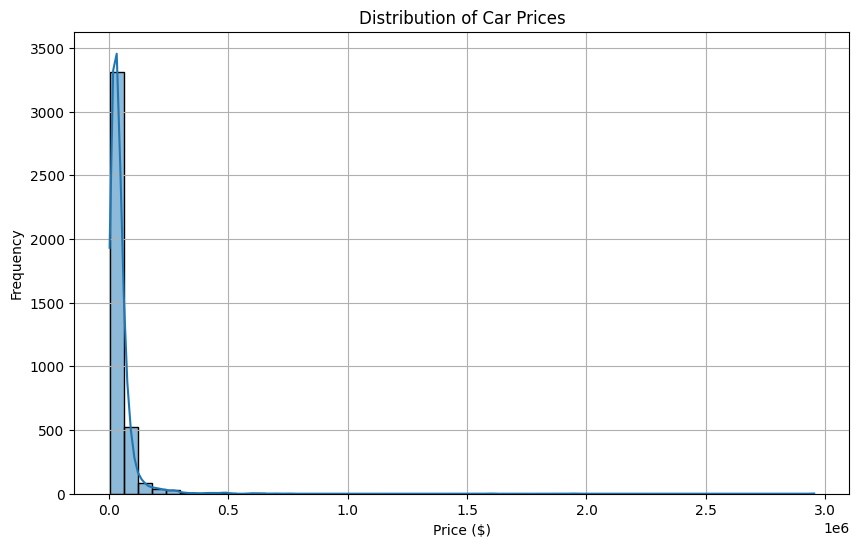

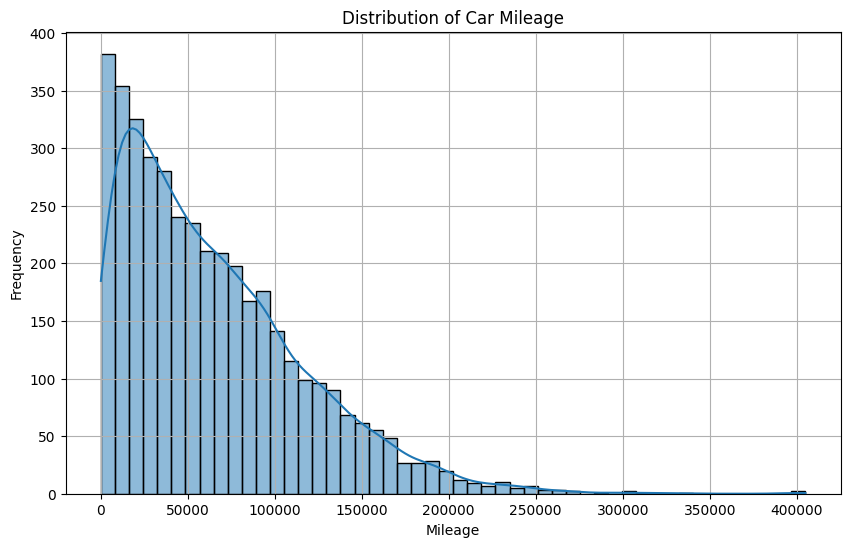

In [ ]:
# Visualize distribution of car prices
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['price'], kde=True, bins=50)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Visualize distribution of car mileage
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['mileage'], kde=True, bins=50)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

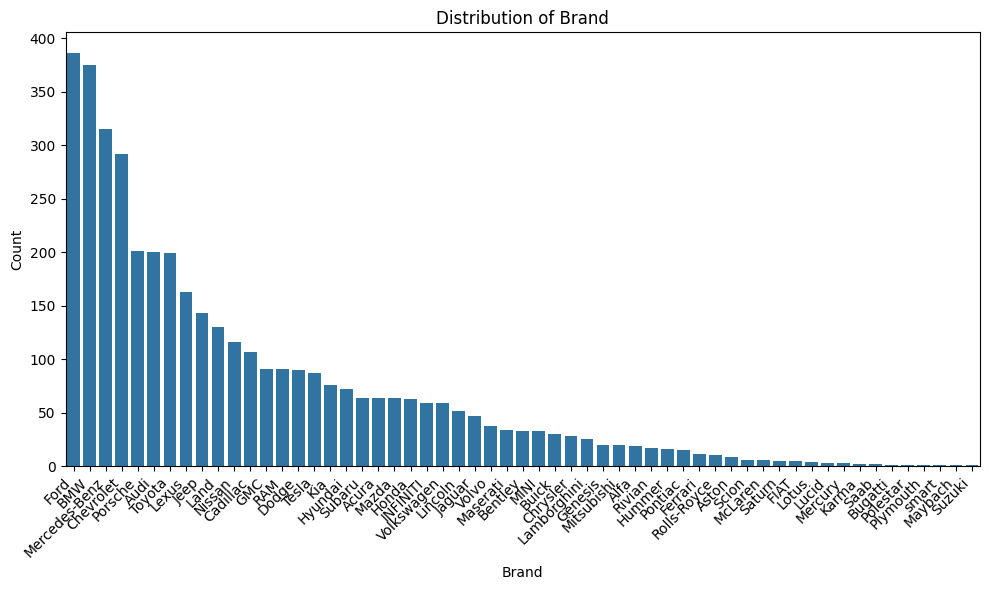

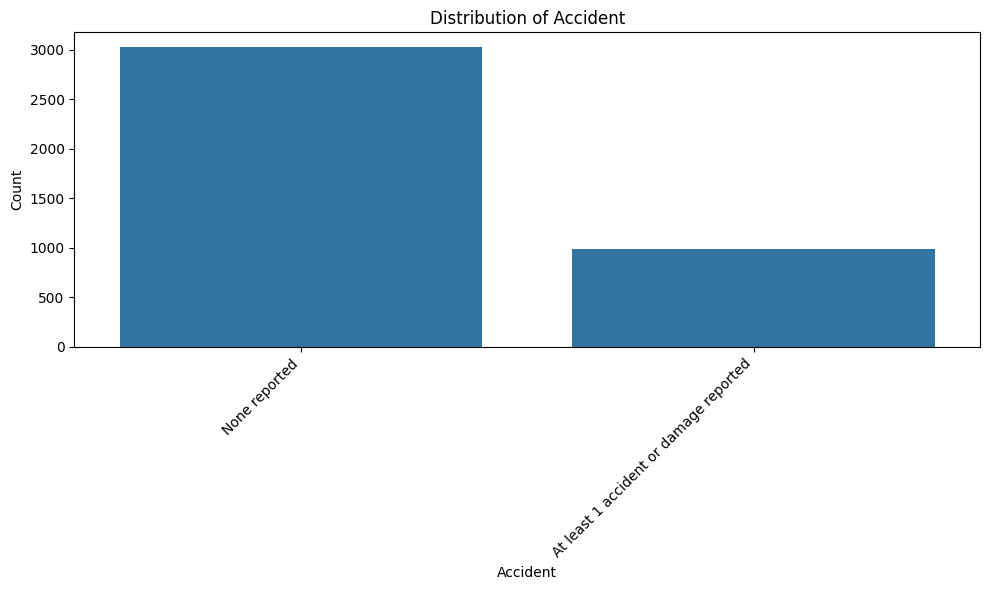

In [ ]:
def plot_distribution(df, col):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate for better readability
    plt.tight_layout()
    plt.show()

# View the distribution of brand and accident
if 'brand' in df_clean.columns:
    brand_col = 'brand'
    plot_distribution(df_clean, brand_col)

plot_distribution(df_clean, 'accident')

Original DataFrame shape: (4009, 12)
DataFrame shape after removing price outliers: (3765, 12)


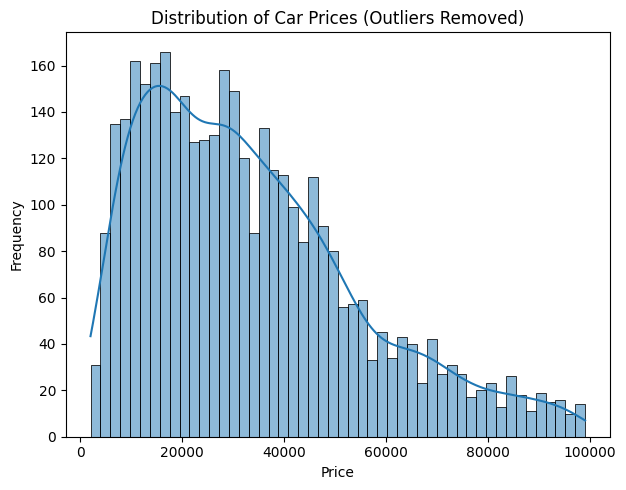

DataFrame shape after removing mileage outliers: (3700, 12)


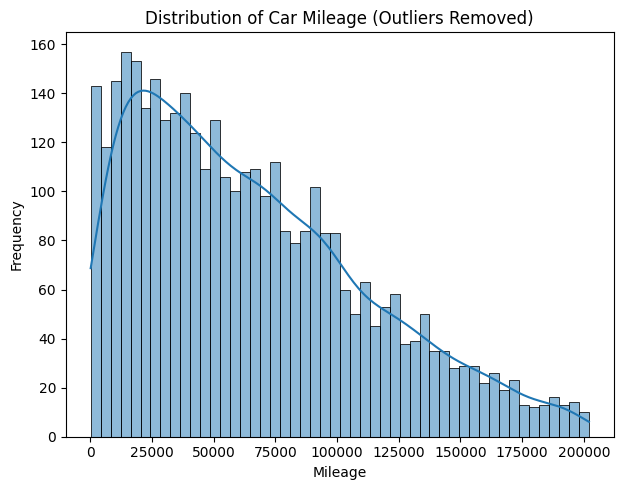

In [ ]:
# Using IQR method to identify and remove outliers
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
print(f"Original DataFrame shape: {df_clean.shape}")
df_clean = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)].copy()
print(f"DataFrame shape after removing price outliers: {df_clean.shape}")

# Visualize distribution of car prices after removing outliers
plt.figure(figsize=(12, 5))

# Histogram of prices without outliers
plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], kde=True, bins=50)
plt.title('Distribution of Car Prices (Outliers Removed)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='both') # Avoid scientific notation

plt.tight_layout()
plt.show()

# Also check mileage for outliers
Q1_mileage = df_clean['mileage'].quantile(0.25)
Q3_mileage = df_clean['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage

# Define bounds for mileage outliers
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

# Filter out the mileage outliers (ensure mileage is not negative)
df_final = df_clean[(df_clean['mileage'] >= max(0, lower_bound_mileage)) & (df_clean['mileage'] <= upper_bound_mileage)].copy()
print(f"DataFrame shape after removing mileage outliers: {df_final.shape}")

# Visualize the distribution of car mileage after removing outliers
plt.figure(figsize=(12, 5))

# Histogram of mileage without outliers
plt.subplot(1, 2, 1)
sns.histplot(df_final['mileage'], kde=True, bins=50)
plt.title('Distribution of Car Mileage (Outliers Removed)')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='both') # Avoid scientific notation

plt.tight_layout()
plt.show()

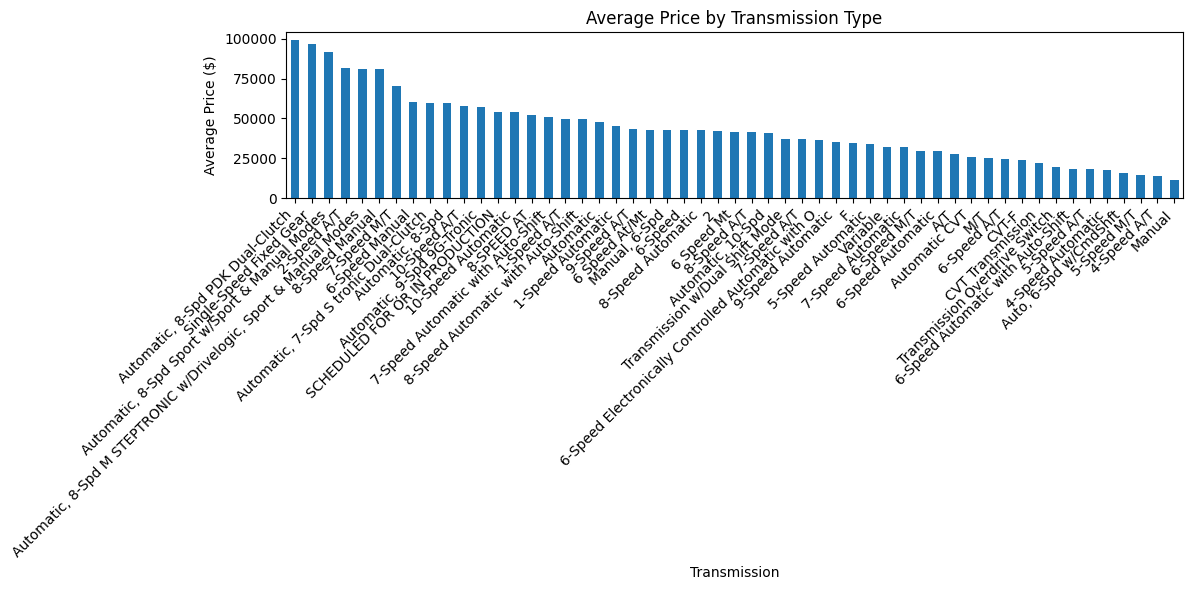

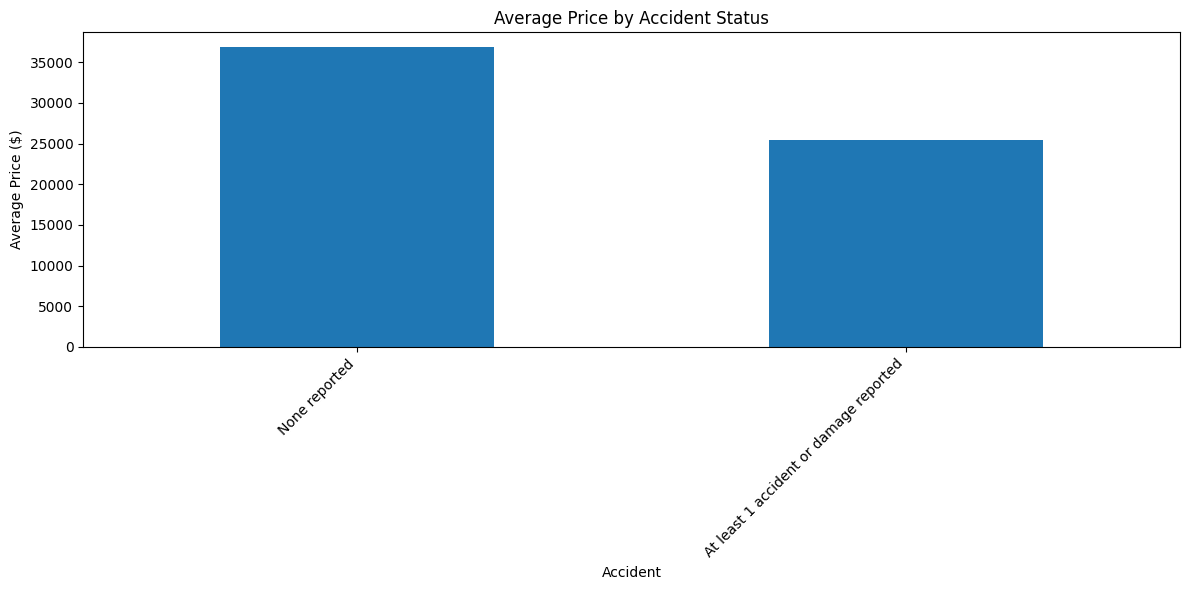

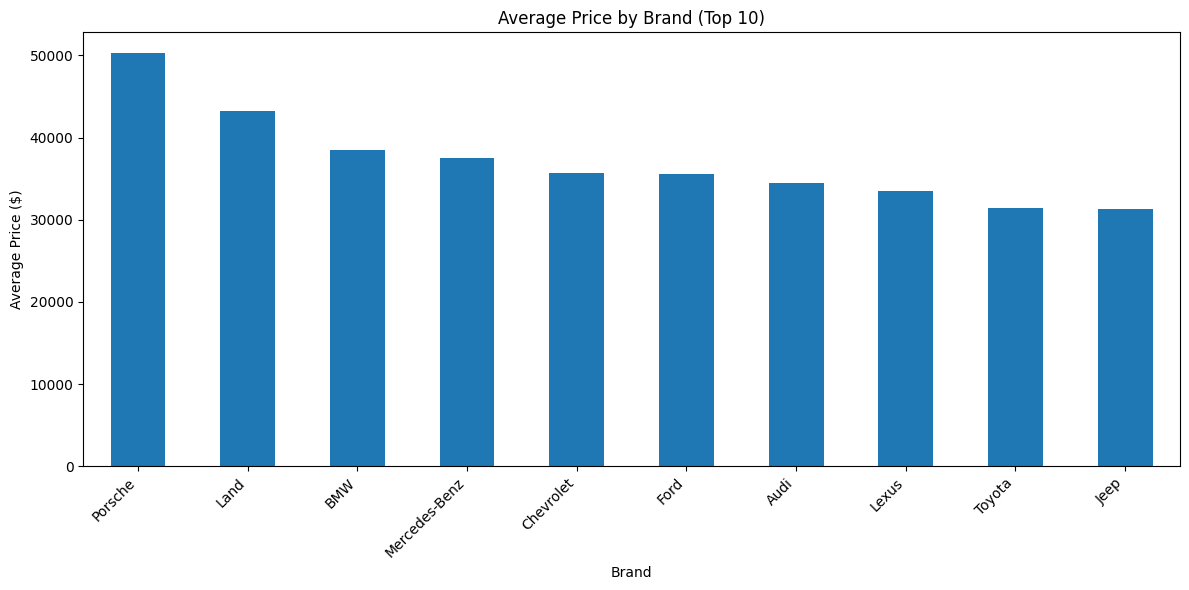

In [ ]:
# Average Price by Transmission
plt.figure(figsize=(12, 6))
transmission_price = df_final.groupby('transmission')['price'].mean().sort_values(ascending=False)
transmission_price.plot(kind='bar')
plt.title('Average Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Price ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average Price by Accident Status
plt.figure(figsize=(12, 6))
accident_price = df_final.groupby('accident')['price'].mean().sort_values(ascending=False)
accident_price.plot(kind='bar')
plt.title('Average Price by Accident Status')
plt.xlabel('Accident')
plt.ylabel('Average Price ($)')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average Price by Brand (Top 10)
if 'brand' in df_final.columns or 'make' in df_final.columns:
    brand_col = 'brand' if 'brand' in df_final.columns else 'make'
    top_brands = df_final[brand_col].value_counts().head(10).index
    brand_avg_price = df_final[df_final[brand_col].isin(top_brands)].groupby(brand_col)['price'].mean().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    brand_avg_price.plot(kind='bar')
    plt.title('Average Price by Brand (Top 10)')
    plt.xlabel('Brand')
    plt.ylabel('Average Price ($)')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

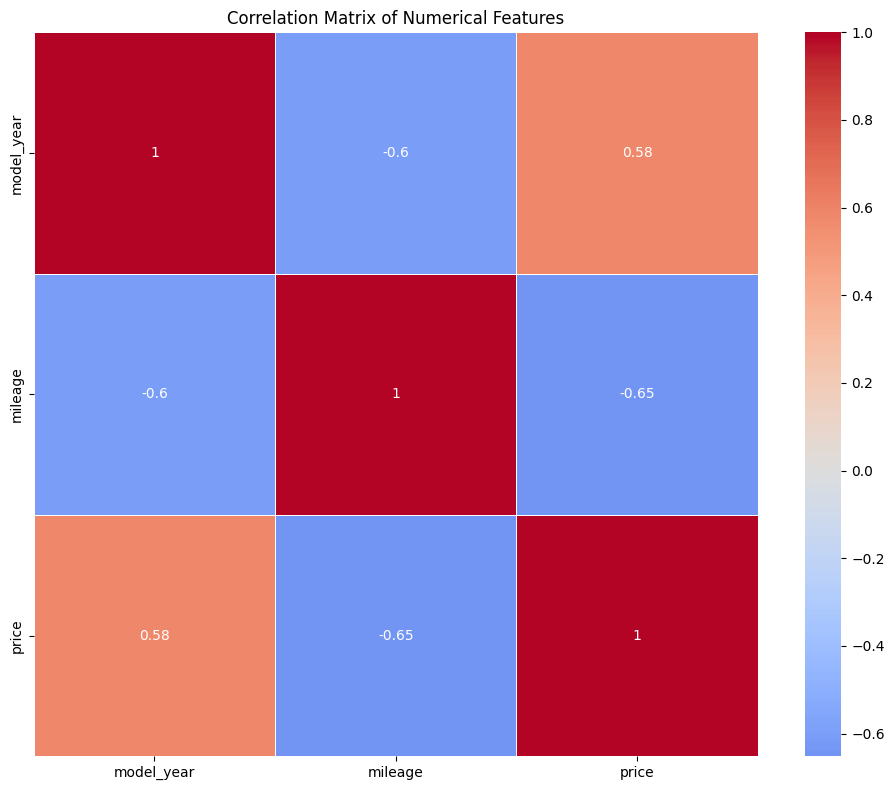

Features most correlated with price:
price         1.000000
model_year    0.584310
mileage      -0.651379
Name: price, dtype: float64


In [ ]:
# View the correlations between price, model year, and mileage
numerical_df = df_final.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Correlation with price
if 'price' in correlation_matrix.columns:
    price_correlations = correlation_matrix['price'].sort_values(ascending=False)
    print("Features most correlated with price:")
    print(price_correlations)

In [ ]:
# Prepare features for Random Forest
df_model = df_final.copy()

# Encode categorical variables
label_encoders = {}
categorical_features = df_model.select_dtypes(include=['object']).columns

for col in categorical_features:
    if col != 'price':  # Don't encode the target variable
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col].astype(str))
        label_encoders[col] = le

X = df_model.drop('price', axis=1)
y = df_model['price']

print("Features we are using in our model:")
print(X.columns.tolist())
print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

df_model

Features we are using in our model:
['brand', 'model', 'model_year', 'mileage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
Feature matrix shape: (3700, 11)
Target variable shape: (3700,)
Training set size: 2960
Test set size: 740


,brand,model,model_year,mileage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,12,1610,2013,51000.0,1,558,14,20,10,0,True,10300.0
1,17,1087,2021,34742.0,2,546,26,154,57,0,True,38005.0
2,24,1218,2022,22372.0,2,523,33,29,10,1,False,54598.0
3,18,1144,2015,88900.0,3,696,20,20,10,1,True,15500.0
4,3,1127,2021,9835.0,2,193,26,97,10,1,False,34999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4003,32,494,2018,53705.0,2,327,31,20,10,0,True,25900.0
4005,3,1342,2022,10900.0,2,686,51,20,10,1,True,53900.0
4006,39,1548,2022,2116.0,2,1024,33,20,10,1,False,90998.0
4007,12,605,2020,33000.0,2,875,31,29,10,1,True,62999.0


In [ ]:
# Initialize the model with optimal parameters
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Model Performance Metrics:")
print(f"Training RMSE: ${train_rmse:,.2f}")
print(f"Test RMSE: ${test_rmse:,.2f}")
print(f"Training MAE: ${train_mae:,.2f}")
print(f"Test MAE: ${test_mae:,.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Model Performance Metrics:
Training RMSE: $4,874.88
Test RMSE: $9,133.79
Training MAE: $3,167.52
Test MAE: $6,299.91
Training R²: 0.9475
Test R²: 0.8187


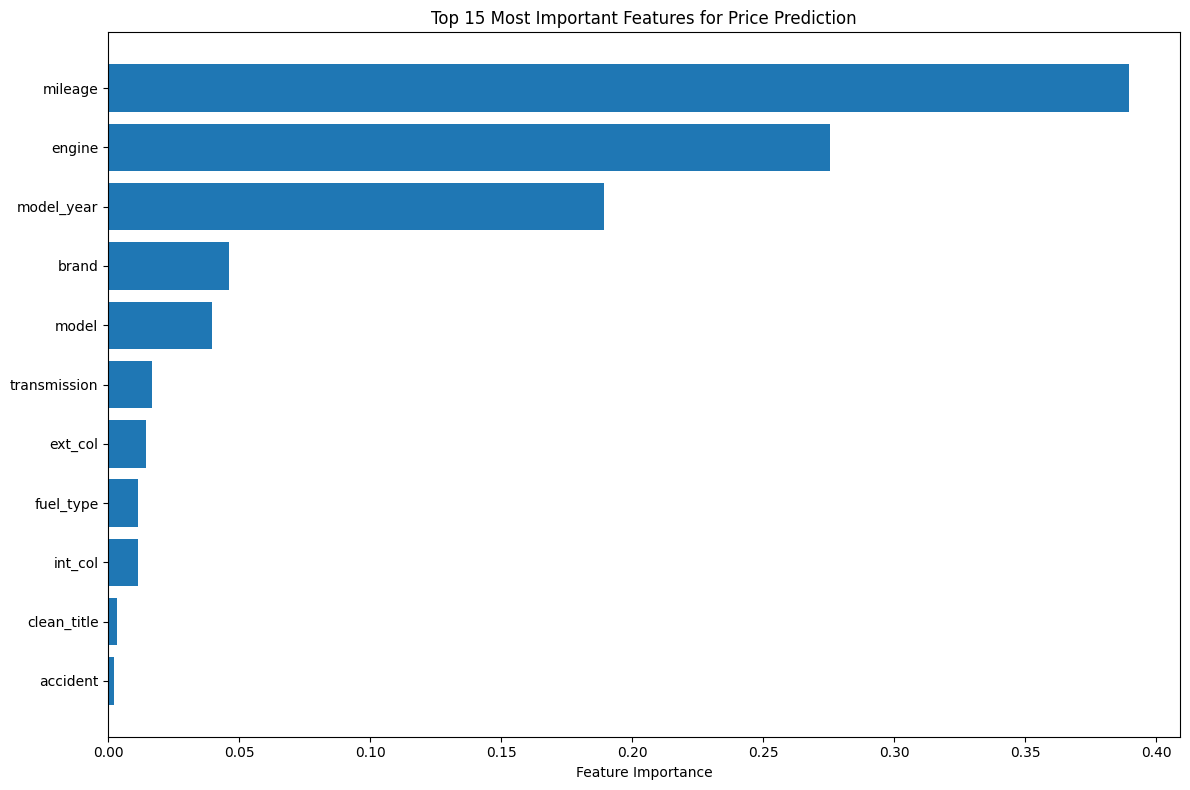

Top 10 Most Important Features:
         feature  importance
3        mileage    0.389614
5         engine    0.275412
2     model_year    0.189379
0          brand    0.045967
1          model    0.039576
6   transmission    0.016874
7        ext_col    0.014522
4      fuel_type    0.011481
8        int_col    0.011439
10   clean_title    0.003353


In [ ]:
# Ranking feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features for Price Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

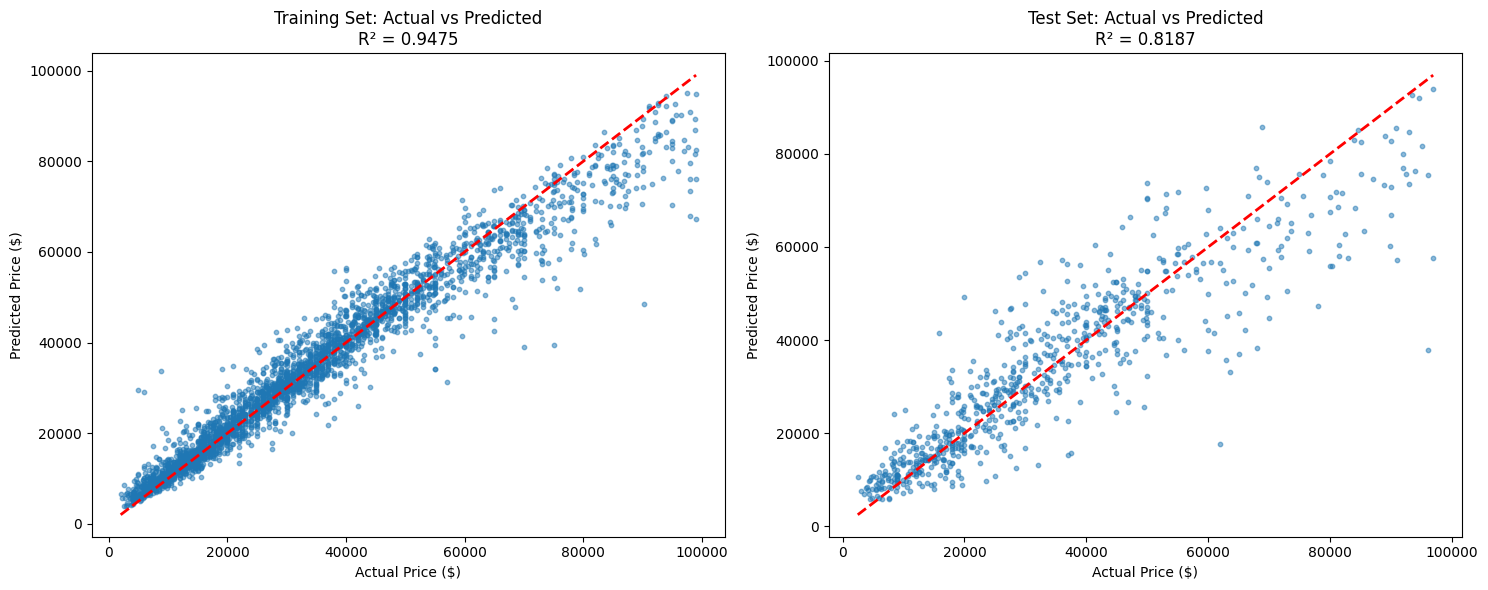

In [ ]:
# Prediction vs Actual plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set
axes[0].scatter(y_train, y_pred_train, alpha=0.5, s=10)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}')

# Test set
axes[1].scatter(y_test, y_pred_test, alpha=0.5, s=10)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Price ($)')
axes[1].set_ylabel('Predicted Price ($)')
axes[1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}')

plt.tight_layout()
plt.show()

In [ ]:
# Analysis by brand
if 'brand' in df_clean.columns:
    brand_stats = df_clean.groupby(brand_col).agg({
        'price': ['count', 'mean', 'median', 'std', 'min', 'max']
    }).round(2)

    brand_stats.columns = ['Count', 'Mean_Price', 'Median_Price', 'Std_Price', 'Min_Price', 'Max_Price']
    brand_stats = brand_stats.sort_values('Mean_Price', ascending=False)

    print("Top 10 Brands by Average Price:")
    print(brand_stats.head(10))

# Analysis by year
if 'year' in df_clean.columns:
    year_stats = df_clean.groupby('year').agg({
        'price': ['count', 'mean', 'median']
    }).round(2)

    year_stats.columns = ['Count', 'Mean_Price', 'Median_Price']

    print("\nPrice Statistics by Year (Last 10 years):")
    print(year_stats.tail(10))

# Analysis by fuel type
if 'fuel_type' in df_clean.columns:
    fuel_stats = df_clean.groupby('fuel_type').agg({
        'price': ['count', 'mean', 'median', 'std']
    }).round(2)

    fuel_stats.columns = ['Count', 'Mean_Price', 'Median_Price', 'Std_Price']
    fuel_stats = fuel_stats.sort_values('Mean_Price', ascending=False)

    print("\nPrice Statistics by Fuel Type:")
    print(fuel_stats)

# Create comparison visualization
if 'year' in df_clean.columns and 'brand' in df_clean.columns:
    # Price trends over time for top brands
    top_5_brands = df_clean['brand'].value_counts().head(5).index

    plt.figure(figsize=(12, 6))
    for brand in top_5_brands:
        brand_data = df_clean[df_clean['brand'] == brand]
        yearly_avg = brand_data.groupby('year')['price'].mean()
        plt.plot(yearly_avg.index, yearly_avg.values, marker='o', label=brand, linewidth=2)

    plt.title('Average Price Trends by Year for Top 5 Brands')
    plt.xlabel('Year')
    plt.ylabel('Average Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

Top 10 Brands by Average Price:
             Count  Mean_Price  Median_Price  Std_Price  Min_Price  Max_Price
brand                                                                        
Rivian          17    93138.18       93500.0    3752.12    82000.0    99000.0
Lucid            2    92950.00       92950.0    8555.99    86900.0    99000.0
Rolls-Royce      2    74650.00       74650.0    7990.31    69000.0    80300.0
Maybach          1    64250.00       64250.0        NaN    64250.0    64250.0
Bentley         13    59660.62       59400.0   20006.83    34995.0    98000.0
Lotus            4    54812.50       53000.0   10644.59    44000.0    69250.0
Karma            2    53250.00       53250.0    3181.98    51000.0    55500.0
Aston            5    51168.00       39000.0   22159.99    32850.0    80000.0
Porsche        147    50277.33       48990.0   22473.10     8500.0    99000.0
Tesla           87    48439.47       45999.0   16173.80    25900.0    95999.0

Price Statistics by Fuel Type:


# **Insights of Used Car DF (Cleaned, Outliers Removed)**

In [ ]:
print("1. MODEL PERFORMANCE:")
print(f"   - The Random Forest model achieves an R² score of {test_r2:.4f} on test data")
print(f"   - Average prediction error (MAE): ${test_mae:,.2f}")
print(f"   - Root Mean Square Error: ${test_rmse:,.2f}")

if test_r2 > 0.8:
    print("   - Model shows EXCELLENT predictive performance")
elif test_r2 > 0.6:
    print("   - Model shows GOOD predictive performance")
elif test_r2 > 0.4:
    print("   - Model shows MODERATE predictive performance")
else:
    print("   - Model shows LIMITED predictive performance")

# Feature importance insights
print(f"\n2. MOST IMPORTANT PRICE FACTORS:")
top_3_features = feature_importance.head(3)
for i, (_, row) in enumerate(top_3_features.iterrows(), 1):
    print(f"   {i}. {row['feature']}: {row['importance']:.4f} importance")

# Price distribution insights
print(f"\n3. PRICE DISTRIBUTION:")
print(f"   - Average car price: ${df_clean['price'].mean():,.2f}")
print(f"   - Most cars are priced between ${df_clean['price'].quantile(0.25):,.2f} and ${df_clean['price'].quantile(0.75):,.2f}")
print(f"   - Price range spans from ${df_clean['price'].min():,.2f} to ${df_clean['price'].max():,.2f}")

# Additional insights based on correlations
if 'price' in correlation_matrix.columns:
    strong_corr = correlation_matrix['price'].abs().sort_values(ascending=False)[1:4]  # Exclude price itself
    print(f"\n4. STRONGEST PRICE CORRELATIONS:")
    for feature, corr in strong_corr.items():
        direction = "positively" if corr > 0 else "negatively"
        print(f"   - {feature}: {direction} correlated ({corr:.3f})")

1. MODEL PERFORMANCE:
   - The Random Forest model achieves an R² score of 0.8187 on test data
   - Average prediction error (MAE): $6,299.91
   - Root Mean Square Error: $9,133.79
   - Model shows EXCELLENT predictive performance

2. MOST IMPORTANT PRICE FACTORS:
   1. mileage: 0.3896 importance
   2. engine: 0.2754 importance
   3. model_year: 0.1894 importance

3. PRICE DISTRIBUTION:
   - Average car price: $33,518.20
   - Most cars are priced between $16,500.00 and $45,500.00
   - Price range spans from $2,000.00 to $99,000.00

4. STRONGEST PRICE CORRELATIONS:
   - mileage: positively correlated (0.651)
   - model_year: positively correlated (0.584)


# **Insights of Used Car DF (Cleaned, Outliers and Luxury Cars Removed)**

In [ ]:
# === Helper print functions ===
def print_model_performance(r2, mae, rmse):
    """
    Prints a summary of model performance metrics.

    Parameters:
    - r2 (float): R-squared score of the model on test data.
    - mae (float): Mean Absolute Error of the predictions.
    - rmse (float): Root Mean Squared Error of the predictions.

    Output:
    - Displays formatted evaluation results including model performance category.
    """
    print("1. MODEL PERFORMANCE:")
    print(f"   - R² score on test data: {r2:.4f}")
    print(f"   - Average prediction error (MAE): ${mae:,.2f}")
    print(f"   - Root Mean Square Error (RMSE): ${rmse:,.2f}")
    status = "EXCELLENT" if r2 > 0.8 else "GOOD" if r2 > 0.6 else "MODERATE" if r2 > 0.4 else "LIMITED"
    print(f"   - Model shows {status} predictive performance")

def print_top_features(feature_importance, n=3):
    """
    Prints the top N most important features based on model feature importance.

    Parameters:
    - feature_importance (pd.DataFrame): DataFrame with 'feature' and 'importance' columns.
    - n (int): Number of top features to display (default is 3).

    Output:
    - Displays top N features ranked by importance.
    """
    print(f"\n2. MOST IMPORTANT PRICE FACTORS:")
    for i, (_, row) in enumerate(feature_importance.head(n).iterrows(), 1):
        print(f"   {i}. {row['feature']}: {row['importance']:.4f} importance")

def print_price_distribution(df):
    """
    Prints summary statistics about price distribution in the dataset.

    Parameters:
    - df (pd.DataFrame): The cleaned dataset containing a 'price' column.

    Output:
    - Displays average price, interquartile range, and price range.
    """
    avg_price = df['price'].mean()
    q1 = df['price'].quantile(0.25)
    q3 = df['price'].quantile(0.75)
    min_price = df['price'].min()
    max_price = df['price'].max()
    print(f"\n3. PRICE DISTRIBUTION:")
    print(f"   - Average car price: ${avg_price:,.2f}")
    print(f"   - Most cars are priced between ${q1:,.2f} and ${q3:,.2f}")
    print(f"   - Price range spans from ${min_price:,.2f} to ${max_price:,.2f}")

def print_strongest_correlations(corr_matrix, target='price', n=3):
    """
    Prints the top N strongest correlations (positive or negative) with the target variable.

    Parameters:
    - corr_matrix (pd.DataFrame): Correlation matrix including the target variable.
    - target (str): The target variable to analyze correlations with (default is 'price').
    - n (int): Number of strongest correlations to display (default is 3).

    Output:
    - Displays features most correlated with the target and their correlation coefficients.
    """
    if target in corr_matrix.columns:
        corr_series = corr_matrix[target].drop(target)
        top_corr = corr_series.abs().sort_values(ascending=False).head(n)
        print(f"\n4. STRONGEST PRICE CORRELATIONS:")
        for feature in top_corr.index:
            value = corr_series[feature]
            direction = "positively" if value > 0 else "negatively"
            print(f"   - {feature}: {direction} correlated ({value:.3f})")

# === Data Cleaning ===

# load data
df = pd.read_csv("used_cars.csv").copy()

# Remove luxury brands
luxury_brands = [
    'Mercedes-Benz', 'Tesla', 'Porsche', 'Rolls Royce', 'Rolls-Royce', 'Pontiac', 'Aston',
    'McLaren', 'Cadillac', 'BMW', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'Land', 'Land Rover',
    'Lincoln', 'Jaguar', 'Bentley', 'Lucid','Lamborghini', 'Maserati', 'Rivian', 'Alfa', 'Alfa Romeo',
    'Ferrari', 'Polestar', 'Buick', 'Lotus', 'Karma', 'Maybach', 'Bugatti'
]
df = df[~df['brand'].astype(str).str.strip().isin(luxury_brands)].copy()

# Clean and convert columns safely
df['milage'] = df['milage'].astype(str).str.replace(',', '').str.extract(r'(\d+)')[0]
df['milage'] = pd.to_numeric(df['milage'], errors='coerce')

df['price'] = df['price'].astype(str).str.replace('[$,]', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df['horsepower'] = df['engine'].astype(str).str.extract(r'(\d+\.?\d*)HP')[0]
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

df['model_year'] = pd.to_numeric(df['model_year'], errors='coerce').astype('Int64')

# Remove price outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()

# Drop rows with missing values in selected features
features = ['milage', 'horsepower', 'model_year']
target = 'price'
df_model = df.dropna(subset=features + [target]).copy()

# === Modeling ===
X = df_model[features]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# === Evaluation ===
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

correlation_matrix = df_model.select_dtypes(include=['number']).corr()

# === Print Summary ===
print_model_performance(test_r2, test_mae, test_rmse)
print_top_features(feature_importance)
print_price_distribution(df_model)
print_strongest_correlations(correlation_matrix)


1. MODEL PERFORMANCE:
   - R² score on test data: 0.8049
   - Average prediction error (MAE): $5,288.53
   - Root Mean Square Error (RMSE): $7,592.62
   - Model shows EXCELLENT predictive performance

2. MOST IMPORTANT PRICE FACTORS:
   1. model_year: 0.5026 importance
   2. horsepower: 0.3757 importance
   3. milage: 0.1217 importance

3. PRICE DISTRIBUTION:
   - Average car price: $26,425.92
   - Most cars are priced between $12,180.00 and $36,992.25
   - Price range spans from $2,300.00 to $79,900.00

4. STRONGEST PRICE CORRELATIONS:
   - horsepower: positively correlated (0.653)
   - model_year: positively correlated (0.633)
   - milage: negatively correlated (-0.622)


**Model 1: Outliers Removed**


---


* **Model Performance:** The Random Forest model achieved an R² score of 0.8187, with an MAE of \$6,299.91 and RMSE of \$9,133.79, indicating excellent predictive performance.
* **Top Predictive Features:**
  * **Mileage** (0.3896 importance)
  * **Engine** (Horsepower) (0.2754 importance)
  * **Model Year** (0.1894 importance )
* **Price Insights:**
  * Average price: \$33,518.20
  * Typical price range: \$16,500 to \$45,500
  * Full range: \$2,000 – \$99,000
* **Key Correlations with Price:**
  * Mileage: positively correlated (0.651)
  * Model Year: positively correlated (0.584)
---

**Model 2: Outliers & Luxury Brands Removed**
* **Model Performance:** Slightly lower R² score of 0.8049, but improved MAE of \$5,288.53 and RMSE of \$7,592.62, still reflecting excellent predictive ability with lower average error.
* **Top Predictive Features:**
  * **Mileage** (0.1217 importance)
  * **Engine** (Horsepower) (0.3757 importance)
  * **Model Year** (0.5026 importance)
* **Price Insights:**
  * **Average price:** \$26,425.92
  * **Typical price range:** \$12,180 – \$36,992.25
  * **Full range:** \$2,300 – \$79,900
* **Key Correlations with Price:**
  * **Horsepower:** positively correlated (0.653)
  * **Model Year:** positively correlated (0.633)
  * **Mileage:** negatively correlated (-0.622)

**Conclusions**
* Removing luxury brands reduced overall average price and narrowed the price distribution, making the dataset more representative of the mainstream market.
* The second model showed lower error rates, even with a slightly lower R² score, likely due to reduced price variance.
* Mileage's role flipped from a positive to a negative correlation in the second dataset, aligning with expectations that more mileage typically lowers value in non-luxury vehicles.
* Model year and horsepower emerged as strong, consistent predictors of price in both models.

# 4. Challenges and Limitations
---


### Data Quality Issues

**Missing Values**: The dataset had missing values in critical columns, specifically `fuel_type` and `accident` fields. While these were addressed through mode imputation (replacing missing values with the most frequent value), this approach may not capture the true underlying patterns and could introduce bias into the model predictions.

**Outlier Management**: Significant outliers were present in both price and mileage data, requiring the use of IQR (Interquartile Range) method for removal. While this improved model performance, it also meant losing potentially valuable data points that could represent legitimate high-end or unique vehicles, reducing the dataset from its original size to 3,700 final observations.

**Data Type Inconsistencies**: The raw data required extensive preprocessing, including converting string representations of numbers (with commas and dollar signs) to proper numerical formats. This suggests potential data collection inconsistencies that could affect reliability.

### Analysis Constraints

**Feature Engineering Limitations**: The analysis relied primarily on basic categorical encoding (Label Encoding) for categorical variables. More sophisticated techniques like one-hot encoding or target encoding might have yielded better results but weren't implemented due to complexity constraints.

**Model Selection**: While Random Forest was chosen and performed well (R² = 0.8187), the analysis didn't explore other potentially superior algorithms like Gradient Boosting, XGBoost, or neural networks that might have provided better predictive accuracy.

**Cross-Validation**: The model evaluation appears to rely on a single train-test split rather than more robust cross-validation techniques, which could lead to overly optimistic performance estimates.

### Key Limitations and Their Impact on Conclusions

**Overfitting Concerns**: The significant gap between training R² (0.9475) and test R² (0.8187) suggests potential overfitting, meaning the model may not generalize as well to completely new data as the test metrics suggest.

**Feature Completeness**: Important pricing factors like vehicle condition, service history, geographic location, and market demand weren't captured in the dataset, limiting the model's real-world applicability.

**Temporal Considerations**: The analysis doesn't account for time-based market fluctuations, seasonal effects, or economic conditions that significantly influence car prices.

**Sample Representativeness**: After outlier removal, the dataset may not represent the full spectrum of the used car market, particularly luxury or rare vehicles, potentially limiting the model's applicability to these segments.

**Prediction Error Impact**: With a Mean Absolute Error of \$6,299.91, the model's predictions could be off by over \$6,000 on average, which represents a substantial margin in car pricing decisions.

These limitations suggest that while the model provides valuable insights into car pricing factors (particularly the importance of mileage, engine type, and model year), its predictions should be used as estimates rather than definitive pricing tools, and additional data collection and more sophisticated modeling approaches would be needed for production-level applications.


# 5. Conclusion and Future Direction
---


## Conclusions

Based on the comprehensive analysis of the car pricing dataset, several key findings emerge in relation to the project objectives:

**Model Effectiveness**: The Random Forest model demonstrates strong predictive capability with an R² score of 0.8187, successfully explaining approximately 82% of the variance in car prices. This indicates that machine learning approaches can effectively predict used car prices when provided with relevant vehicle characteristics.

**Primary Price Drivers**: The analysis conclusively identifies the three most critical factors influencing car prices: mileage (38.96% importance), engine specifications (27.54% importance), and model year (18.94% importance). These three features alone account for over 85% of the model's decision-making process, providing clear guidance for both buyers and sellers.

**Market Insights**: The data reveals a typical used car market structure with an average price of \$33,518, where most vehicles fall within the \$16,500-\$45,500 range. The strong positive correlations between price and mileage (0.651) and model year (0.584) confirm expected market behaviors - newer cars with lower mileage command higher prices.

**Feature Relationships**: The analysis successfully mapped how different vehicle characteristics impact pricing, with transmission type, accident history, and brand also playing significant roles in price determination, though secondary to the primary trio of factors.

## Recommendations and Future Directions

### Immediate Actions Based on Findings

**For Car Buyers**: Prioritize vehicles with lower mileage and newer model years for better value retention. Focus negotiation efforts on these primary factors rather than secondary features like exterior color or interior specifications.

**For Car Sellers**: Emphasize mileage, engine specifications, and model year in marketing materials. Vehicles with these favorable characteristics should be priced accordingly to capture maximum market value.

**For Dealerships**: Implement the predictive model as a pricing support tool, while acknowledging the ±\$6,300 average prediction error. Use it for initial price estimates rather than final pricing decisions.

### Strategic Recommendations

**Data Collection Enhancement**: Prioritize gathering additional features that could improve model accuracy, including vehicle condition ratings, service history, geographic location, and current market demand indicators.

**Model Implementation**: Deploy the current model as a baseline pricing tool while continuously collecting feedback to refine predictions. Establish confidence intervals around predictions to communicate uncertainty appropriately.

### Future Research Directions

**Market Dynamics Integration**: Incorporate temporal analysis to understand seasonal pricing patterns, economic cycle impacts, and regional market variations. This could significantly improve prediction accuracy and practical applicability.

**Feature Engineering Expansion**: Develop more sophisticated categorical encoding techniques and explore feature interactions. Consider creating composite features that capture vehicle desirability or rarity indices.

**Real-Time Market Analysis**: Build capabilities to incorporate current market conditions, inventory levels, and demand fluctuations into the pricing model. This would address one of the current model's major limitations.

**Specialized Market Segments**: Develop separate models for different vehicle categories (luxury, economy, SUVs, sedans) to capture segment-specific pricing behaviors that the general model might miss.

**User Interface Development**: Create an accessible tool for end users that can provide price estimates with appropriate uncertainty bounds and explanations of key factors driving the predictions.

**Validation Studies**: Conduct longitudinal studies to test model predictions against actual market transactions over time, enabling continuous model refinement and accuracy improvement.

# 6. References
---

**Dataset Source:**

Taeef Najib. (2023). Used Car Price Prediction Dataset. Kaggle. Retrieved from https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset/data

**Technical References:**

Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830.
Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32.
McKinney, W. (2010). Data Structures for Statistical Computing in Python. Proceedings of the 9th Python in Science Conference, 51-56.


**Visualization Libraries:**

Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. Computing in Science & Engineering, 9(3), 90-95.
Waskom, M. L. (2021). Seaborn: Statistical Data Visualization. Journal of Open Source Software, 6(60), 3021.


**Additional Tools:**
- NumPy Documentation: https://numpy.org/doc/
- Pandas Documentation: https://pandas.pydata.org/docs/
- Scikit-learn Documentation: https://scikit-learn.org/stable/